In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files

In [ ]:
#Load Dataset
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print(train_images.shape)

(60000, 28, 28)


In [ ]:
#Normalize images to be in between 0 & 1 and reshape them
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [ ]:
print(train_images.shape)
#1 > gray scale > 1 channel
# convolution requires the number of channels hence we reshape
# for an RGB image the channels are 3 hence channel will be 3

(60000, 28, 28, 1)


In [ ]:
#Convert labels to one hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
#to_categorical > converts in to integer labels

In [ ]:
#Buliding the CNN model
#Instantiating the Sequential model

model= Sequential()

#Add layers one by one
#Parameters >   Weights > learnable
#Hyperparameters are not learnable > its defined based on experiments
#(3,3) filter - learnable
#By default stride=1
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1),padding='same')) #input shape for 1 image #Convolution Layer
model.add(MaxPooling2D((2,2))) #Maxpooling layer filters/parameters > (2,2) kernel size #Not learnable > max in the pool
model.add(Conv2D(64,(3,3),activation='relu'))#conv layer with 64 fiters of (3,3) size
model.add(MaxPooling2D((2,2)))
model.add(Flatten()) # Flatten > to convert to 1D; done before feeding in to fully connected layer
model.add(Dense(128,activation='relu'))#no of neurons 128
model.add(Dropout(0.5)) #Half of the neurons get dropped randomly as 0.5 dropout > dropout is done to avoid overfitting and make the model simpler
#There's only one hidden layer in this network
model.add(Dense(10,activation='softmax'))#op layer > softmax is usually used in op layer if the op is non-binary
#If op is binary we use Sigmoid

In regression there is no activation function > we use activation function in case of non-continuous cases

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#We are using adam optimizer > adaptive, loss function, we use metrics as accuracy (Whatever predicted correctly divided by total)

In [ ]:
#Train the model #epoch > 1 iteration through entire dataset
model.fit(train_images, train_labels, epochs=5, batch_size=32)
#Time around 27ms per epoch

Epoch 1/5
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2049 - accuracy: 0.9378
Epoch 2/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0748 - accuracy: 0.9779
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0556 - accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0363 - accuracy: 0.9889


In [ ]:
#Save the trained model
model.save('mnist_cnn_model.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

#Accuracy = 99.21%, Loss = 0.024956, 27ms per epoch
#On adding stride =2, accuracy decreases to 97.76 and training time decreases to 7ms per epoch
#On adding stride=2 and padding as same > training time increases comparatively to 10ms per epoch accuracy increases comparatively to 98.68%
#On adding above and changing the filter to 5*5, accuracy increases to 99% , training time 13ms per epoch
#On adding above and changing the filter to 7*7, accuracy increases to 98.91% , training time 20ms per epoch

#On removing the strides and the padding, and adding filter 7*7, training time~70ms per epoch; accuracy=98.83%
#On removing the strides and the padding, and adding filter 5*5, training time~65ms per epoch; accuracy=99.29%
#On adding padding with filter 3*3, accuracy = 99.29%, training time ~ 59ms

#3*3 on first conv and 5*5 on the next one ....accuracy increased from frst one



313/313 [==============================] - 3s 9ms/step - loss: 0.0223 - accuracy: 0.9929
Test accuracy: 0.992900013923645
Test loss: 0.02228955179452896


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Number4_Image.png to Number4_Image (1).png


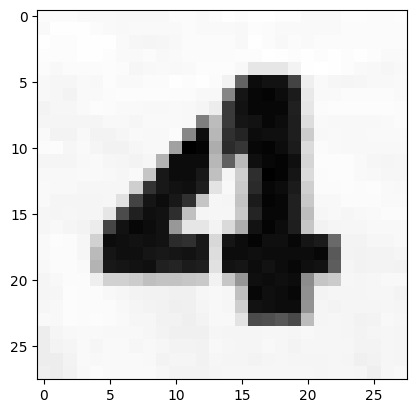

1/1 [==============================] - 0s 98ms/step
Predicted Label: 4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Process the uploaded image
for fn in uploaded.keys():
    # Read, preprocess and display image
    path = '/content/' + fn
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (28, 28))
    plt.imshow(img_resized, cmap='gray')
    plt.show()

    # Preprocess the image for the model
    img_normalized = img_resized / 255.0
    if img_normalized[14, 14] > 0.5:  # Check the center pixel & invert if needed
        img_normalized = 1.0 - img_normalized
    img_normalized = np.expand_dims(img_normalized, axis=0)
    img_normalized = np.expand_dims(img_normalized, axis=-1)

    # Load the saved CNN model and predict
    loaded_model = load_model('mnist_cnn_model.keras')
    prediction = loaded_model.predict(img_normalized)
    predicted_label = np.argmax(prediction)

    print(f"Predicted Label: {predicted_label}")